In [1]:
!pip install pycuda

In [2]:
import pycuda.autoinit
import pycuda.driver as cuda
from pycuda.compiler import SourceModule
import numpy

a = numpy.random.rand(4,4)
a = a.astype(numpy.float32)
a_gpu = cuda.mem_alloc(a.nbytes)
cuda.memcpy_htod(a_gpu, a)

mod = SourceModule("""
__global__    void doublify(float *a)
{
int idx = threadIdx.x + threadIdx.y*4; a[idx] *= 2;
} """)

func = mod.get_function("doublify")
func(a_gpu, block=(4,4,1))

a_doubled = numpy.empty_like(a)
cuda.memcpy_dtoh(a_doubled, a_gpu)
print(a_doubled)
print()
print(a)

[[1.9444577  1.5796843  1.1110044  0.21615766]
 [0.6998384  0.12679993 1.5655054  1.5280898 ]
 [1.945969   1.7610545  1.6084149  0.25137708]
 [1.2713321  1.1102079  0.7167932  1.537399  ]]

[[0.9722288  0.7898421  0.5555022  0.10807883]
 [0.3499192  0.06339996 0.7827527  0.7640449 ]
 [0.9729845  0.88052726 0.80420744 0.12568854]
 [0.6356661  0.55510396 0.3583966  0.7686995 ]]


In [3]:
import pycuda.gpuarray as gpuarray
import pycuda.driver as cuda
import pycuda.autoinit
import numpy

a_gpu = gpuarray.to_gpu(numpy.random.randn(4,4).astype(numpy.float32))
a_doubled = (2*a_gpu).get()
print(a_doubled)
print(a_gpu)

[[ 2.3935096   1.0846727   0.22546715 -0.22514753]
 [ 0.45307636 -2.6983373  -3.8201966   1.9703609 ]
 [-1.3033754  -0.9054653  -5.29428    -2.3412793 ]
 [-2.6305134  -1.2719121  -1.9832766  -4.696423  ]]
[[ 1.1967548   0.54233634  0.11273357 -0.11257377]
 [ 0.22653818 -1.3491687  -1.9100983   0.98518044]
 [-0.6516877  -0.45273265 -2.64714    -1.1706396 ]
 [-1.3152567  -0.63595605 -0.9916383  -2.3482115 ]]


In [4]:
import pycuda.driver as drv
import pycuda.tools
import pycuda.autoinit
import numpy
import numpy.linalg as la
from pycuda.compiler import SourceModule

mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(400,1,1))

print(dest-a*b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [10]:
# This code block is only for local machine without Colab

import time
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

mod = SourceModule("""
    #include <stdio.h>

    __global__ void say_hi_from_block()
    {
      printf("I am blockIdx.x:%d blockIdx.y:%d \\n",blockIdx.x,blockIdx.y);
    }

    __global__ void say_hi_from_thread()
    {
      printf("I am threadIdx.x:%d threadIdx.y:%d blockIdx.x:%d blockIdx.y:%d\\n",threadIdx.x,threadIdx.y,blockIdx.x,blockIdx.y);
    }

    __global__ void say_index_from_thread_block()
    {
      printf("I am Idx:%d threadIdx.x:%d blockIdx.x:%d \\n",threadIdx.x + blockIdx.x * blockDim.x, threadIdx.x, blockIdx.x);
    }

    __global__ void say_index_from_thread_2d()
    {
      printf("I am Idx:%d threadIdx.x:%d threadIdx.y:%d \\n",threadIdx.x + threadIdx.y * blockDim.x, threadIdx.x, threadIdx.y);
    }
    """)

func_blk = mod.get_function("say_hi_from_block")
func_thd = mod.get_function("say_hi_from_thread")
func_idx_tb = mod.get_function("say_index_from_thread_block")
func_idx_t2 = mod.get_function("say_index_from_thread_2d")

func_blk(block=(1,1,1),grid=(10,1,1))
time.sleep(1)
print()
func_blk(block=(1,1,1),grid=(2,2,1))
time.sleep(1)
print()
func_blk(block=(2,1,1),grid=(2,1,1))
time.sleep(1)
print()

print()
func_thd(block=(3,3,1),grid=(1,1,1))
time.sleep(1)
print()
func_thd(block=(3,1,1),grid=(2,1,1))
time.sleep(1)
print()


print()
func_idx_tb(block=(3,1,1),grid=(2,1,1))
time.sleep(1)
print()
func_idx_tb(block=(3,2,1),grid=(1,1,1))
time.sleep(1)
print()

print()
func_idx_t2(block=(3,2,1),grid=(1,1,1))
time.sleep(1)
print()

/usr/local/lib/python3.11/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()


In [6]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from time import time


t1 = time()
#host_data = np.float32( np.random.random(5000) )
host_data = np.float32( np.random.random(5000000) )
#host_data = np.float32( np.random.random(500000000) )
#host_data = np.float32( np.random.random(1000000000) )
t2 = time()
print(host_data.size)
print('total time to  create on CPU: %f' % (t2 - t1))

t1 = time()
host_data_2x =  host_data * np.float32(2)
t2 = time()

print('total time to compute on CPU: %f' % (t2 - t1))

t1 = time()
device_data = gpuarray.to_gpu(host_data)
pycuda.autoinit.context.synchronize()
t2 = time()

print('tranfer time from CPU to GPU: %f' % (t2 - t1))

t1 = time()
device_data_2x =  device_data * np.float32( 2 )
pycuda.autoinit.context.synchronize()
t2 = time()
print('total time to compute on GPU: %f' % (t2 - t1))

t1 = time()
from_device = device_data_2x.get()
pycuda.autoinit.context.synchronize()
t2 = time()
print('tranfer time from GPU to CPU: %f' % (t2 - t1))

print('Is the host computation the same as the GPU computation? : {}'.format(np.allclose(from_device, host_data_2x) ))

5000000
total time to  create on CPU: 0.059807
total time to compute on CPU: 0.007268
tranfer time from CPU to GPU: 0.005695
total time to compute on GPU: 0.000726
tranfer time from GPU to CPU: 0.008514
Is the host computation the same as the GPU computation? : True


In [7]:
import pycuda.driver as drv
import pycuda.autoinit
for attr in drv.Device(0).get_attributes():
    print(attr)


print("MAX_BLOCK_DIM_X", drv.Device(0).get_attribute(drv.device_attribute.MAX_BLOCK_DIM_X))
print("MAX_BLOCK_DIM_Y", drv.Device(0).get_attribute(drv.device_attribute.MAX_BLOCK_DIM_Y))
print("MAX_BLOCK_DIM_Z", drv.Device(0).get_attribute(drv.device_attribute.MAX_BLOCK_DIM_Z))

print("MAX_GRID_DIM_X", drv.Device(0).get_attribute(drv.device_attribute.MAX_GRID_DIM_X))
print("MAX_GRID_DIM_Y", drv.Device(0).get_attribute(drv.device_attribute.MAX_GRID_DIM_Y))
print("MAX_GRID_DIM_Z", drv.Device(0).get_attribute(drv.device_attribute.MAX_GRID_DIM_Z))

ASYNC_ENGINE_COUNT
CAN_MAP_HOST_MEMORY
CAN_USE_HOST_POINTER_FOR_REGISTERED_MEM
CLOCK_RATE
COMPUTE_CAPABILITY_MAJOR
COMPUTE_CAPABILITY_MINOR
COMPUTE_MODE
COMPUTE_PREEMPTION_SUPPORTED
CONCURRENT_KERNELS
CONCURRENT_MANAGED_ACCESS
DIRECT_MANAGED_MEM_ACCESS_FROM_HOST
ECC_ENABLED
GENERIC_COMPRESSION_SUPPORTED
GLOBAL_L1_CACHE_SUPPORTED
GLOBAL_MEMORY_BUS_WIDTH
GPU_OVERLAP
HANDLE_TYPE_POSIX_FILE_DESCRIPTOR_SUPPORTED
HANDLE_TYPE_WIN32_HANDLE_SUPPORTED
HANDLE_TYPE_WIN32_KMT_HANDLE_SUPPORTED
HOST_NATIVE_ATOMIC_SUPPORTED
INTEGRATED
KERNEL_EXEC_TIMEOUT
L2_CACHE_SIZE
LOCAL_L1_CACHE_SUPPORTED
MANAGED_MEMORY
MAXIMUM_SURFACE1D_LAYERED_LAYERS
MAXIMUM_SURFACE1D_LAYERED_WIDTH
MAXIMUM_SURFACE1D_WIDTH
MAXIMUM_SURFACE2D_HEIGHT
MAXIMUM_SURFACE2D_LAYERED_HEIGHT
MAXIMUM_SURFACE2D_LAYERED_LAYERS
MAXIMUM_SURFACE2D_LAYERED_WIDTH
MAXIMUM_SURFACE2D_WIDTH
MAXIMUM_SURFACE3D_DEPTH
MAXIMUM_SURFACE3D_HEIGHT
MAXIMUM_SURFACE3D_WIDTH
MAXIMUM_SURFACECUBEMAP_LAYERED_LAYERS
MAXIMUM_SURFACECUBEMAP_LAYERED_WIDTH
MAXIMUM_SURFACECU

In [8]:
import pycuda.gpuarray as gpuarray
import pycuda.driver as drv
import pycuda.autoinit
import numpy as np

from pycuda.compiler import SourceModule
func_mod = SourceModule("""
__global__ void incr(float *a, int N)
    {
        int idx = threadIdx.x;
//        printf("I am %d\\n",threadIdx.x);
        if (idx < N)
            a[idx] = a[idx] + 1.0;
    }
""")

incr = func_mod.get_function('incr')

N = 10
x = np.asarray(np.random.rand(N), np.float32)
x_orig = x.copy()
x_gpu = gpuarray.to_gpu(x)

incr(x_gpu.gpudata, np.uint32(N), block=(N, 1, 1))
print('x:       ', x)
print('incr(x): ', x_gpu.get())

x:        [0.5693179  0.70197856 0.6196545  0.46012598 0.30368298 0.87067825
 0.10977086 0.3589352  0.38942346 0.33129272]
incr(x):  [1.5693178 1.7019786 1.6196544 1.4601259 1.303683  1.8706782 1.1097709
 1.3589352 1.3894235 1.3312927]


In [9]:
import numpy as np
import pycuda.autoinit
import pycuda.driver as drv
from pycuda.compiler import SourceModule
from pycuda import gpuarray as gp

ker = SourceModule('''
// matrix multiplication kernel that is parallelized over row/column tuples.
__global__ void matrix_mult_ker(float * matrix_a, float * matrix_b, float * output_matrix, int N)
{

    int row = blockIdx.x*blockDim.x + threadIdx.x;
    int col = blockIdx.y*blockDim.y + threadIdx.y;

    for (int k=0; k < N; k++)
    {
       output_matrix[ col + row*N ] += matrix_a[ row*N + k ] * matrix_b[ col + k*N ];
    }

}
''')
matrix_mult_ker = ker.get_function("matrix_mult_ker")

size = 32
myA = np.random.rand( size, size )
myB = np.random.rand( size, size )

gpuA = gp.to_gpu(np.float32(myA))
gpuB = gp.to_gpu(np.float32(myB))
gpuC = gp.empty_like(gpuA)

# print("=" * 80)
# print(myA)
# print("=" * 80)
# print(myB)

myC = np.matmul(myA, myB)
matrix_mult_ker( gpuA, gpuB, gpuC, np.int32(size), block=(size,size,1) )

# print("=" * 80)
# print(myC)

print( np.sum( np.abs(gpuC.get() - myC) ) )

0.0005446255471133199


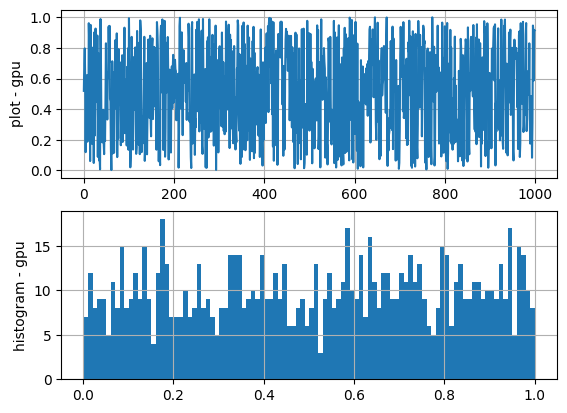

In [10]:
import pycuda.autoinit
import pycuda.curandom as curandom

size = 1000
a = curandom.rand((size,)).get()

from matplotlib.pylab import *
subplot(211)
plot(a)
grid(True)
ylabel('plot - gpu')

subplot(212)
hist(a, 100)
grid(True)
ylabel('histogram - gpu')

show('plot-random-data')

In [11]:
import numpy
import pycuda.autoinit
import pycuda.driver as cuda
from pycuda.compiler import SourceModule

mod = SourceModule("""
#include<math.h>
__global__ void manhattan(  int* result, int width, int height, float x, float y) {
    int xIndex = blockDim.x * blockIdx.x + threadIdx.x;
    int yIndex = blockDim.y * blockIdx.y + threadIdx.y;
    int flatIndex = xIndex + width * yIndex;
    //printf("%d\\n",flatIndex);
    result[flatIndex] = abs(xIndex-x) + abs(yIndex-y);
}
__global__ void euclidean(  int* result, int width, int height, float x, float y) {
    int xIndex = blockDim.x * blockIdx.x + threadIdx.x;
    int yIndex = blockDim.y * blockIdx.y + threadIdx.y;
    int flatIndex = xIndex + width * yIndex;
    //printf("%d\\n",flatIndex);
    result[flatIndex] = round(sqrt((xIndex-x)*(xIndex-x) + (yIndex-y)*(yIndex-y)));
}
__global__ void chebyshev(  int* result, int width, int height, float x, float y) {
    int xIndex = blockDim.x * blockIdx.x + threadIdx.x;
    int yIndex = blockDim.y * blockIdx.y + threadIdx.y;
    int flatIndex = xIndex + width * yIndex;
    //printf("%d\\n",flatIndex);
    result[flatIndex] = max(abs(xIndex-x),abs(yIndex-y));
}
""")

mhn_func   = mod.get_function("manhattan")
eun_func   = mod.get_function("euclidean")
chv_func   = mod.get_function("chebyshev")

def mhn_distance(res):
    x = numpy.float32(2)
    y = numpy.float32(1)
    height, width = numpy.int32(len(res)), numpy.int32(len(res[0]))
    mhn_func(
        cuda.InOut(res),
        width,
        height,x,y,
        block=(nx,ny,1)
        )

def eun_distance(res):
    x = numpy.float32(2)
    y = numpy.float32(1)
    height, width = numpy.int32(len(res)), numpy.int32(len(res[0]))
    eun_func(
        cuda.InOut(res),
        width,
        height,x,y,
        block=(nx,ny,1)
        )

def chv_distance(res):
    x = numpy.float32(2)
    y = numpy.float32(1)
    height, width = numpy.int32(len(res)), numpy.int32(len(res[0]))
    chv_func(
        cuda.InOut(res),
        width,
        height,x,y,
        block=(nx,ny,1)
        )

nx = 7
ny = 5
res = numpy.zeros( (ny,nx), dtype='int32')
print(res)
print("=================")
mhn_distance(res)
print(res)
print("=================")
res = numpy.zeros( (ny,nx), dtype='int32')
eun_distance(res)
print(res)
print("=================")
res = numpy.zeros( (ny,nx), dtype='int32')
chv_distance(res)
print(res)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[3 2 1 2 3 4 5]
 [2 1 0 1 2 3 4]
 [3 2 1 2 3 4 5]
 [4 3 2 3 4 5 6]
 [5 4 3 4 5 6 7]]
[[2 1 1 1 2 3 4]
 [2 1 0 1 2 3 4]
 [2 1 1 1 2 3 4]
 [3 2 2 2 3 4 4]
 [4 3 3 3 4 4 5]]
[[2 1 1 1 2 3 4]
 [2 1 0 1 2 3 4]
 [2 1 1 1 2 3 4]
 [2 2 2 2 2 3 4]
 [3 3 3 3 3 3 4]]


In [12]:
# matrix multiplication with cupy

import numpy as np
import cupy  as cp

size = 2
myA = np.random.rand( size, size )
myB = np.random.rand( size, size )

myC = np.dot(myA, myB)

myA_gpu = cp.asarray( myA )
myB_gpu = cp.asarray( myB )
myC_gpu = cp.dot( myA, myB )

myC_cpu = cp.asnumpy( myC_gpu )

print( np.min( np.abs(myC_cpu - myC) ) )

0.0


In [13]:
# comparison between numpy and cupy

import numpy as np
import cupy  as cp

N = 10
M =  5

X_cpu = np.random.rand( N, N )
Y_cpu = np.random.rand( N, M )
Z_cpu = np.dot( X_cpu, Y_cpu )

print(sum(sum(Z_cpu)))

X_gpu = cp.random.rand( N, N )
Y_gpu = cp.random.rand( N, M )
Z_gpu = cp.dot( X_gpu, Y_gpu)

print(sum(sum(Z_gpu)))

140.88454036804364
125.02283627281419


In [1]:
# comparison between numpy and cupy

import numpy as np
import cupy  as cp
from time import time

N = 10000  # 40000
M = 10000  # 40000

X_cpu = np.random.rand( N, N )
Y_cpu = np.random.rand( N, M )

t1 = time()
Z_cpu = np.dot( X_cpu, Y_cpu )
t2 = time()

print(sum(sum(Z_cpu)))
print(t2-t1)

X_gpu = cp.random.rand( N, N )
Y_gpu = cp.random.rand( N, M )

t1 = time()
Z_gpu = cp.dot( X_gpu, Y_gpu)
t2 = time()

print(sum(sum(Z_gpu)))
print(t2-t1)

250008693073.0176
37.41579723358154
249984588007.5665
0.7278614044189453


In [2]:
# cupy kernal 1

import cupy  as cp
import numpy as np

squared_diff = cp.ElementwiseKernel(
        'float32 x, float32 y',
        'float32 z',
        'z = (x - y) * (x - y)',
        'squred_diff'
        )

x = cp.arange(10, dtype=np.float32).reshape(2, 5)
y = cp.arange(5,  dtype=np.float32)

z = squared_diff(x, y)

print(x)
print(y)
print(z)

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[0. 1. 2. 3. 4.]
[[ 0.  0.  0.  0.  0.]
 [25. 25. 25. 25. 25.]]


In [3]:
# cupy kernal 2

import cupy  as cp
import numpy as np

add_reverse = cp.ElementwiseKernel(
        'T x, raw T y',
        'T z',
        'z = x + y[_ind.size() - i - 1]',
        'add_reverse'
        )

x = cp.arange(5, dtype=np.float32)
y = cp.arange(5, dtype=np.float32)

z = add_reverse(x, y)

print(x)
print(y)
print(z)

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[4. 4. 4. 4. 4.]


In [4]:
# cupy kernal 3

import cupy  as cp
import numpy as np

l2norm = cp.ReductionKernel(
        'T x',
        'T y',
        'x * x',
        'a + b',
        'y = sqrt(a)',
        '0',
        'l2norm'
        )

x = cp.arange(5, dtype=np.float32)

y = l2norm(x)

print(x)
print(y)

[0. 1. 2. 3. 4.]
5.477226


In [5]:
# cupy kernal 4

import cupy  as cp
import numpy as np

square_kernel = cp.RawKernel(r'''
extern "C" __global__ void my_square(long long* x) {
    int tid = threadIdx.x;
    x[tid] *= x[tid];
}
''', name='my_square')

x = cp.arange(5)
print(x)

square_kernel(grid=(1,), block=(5,), args=(x,))
print(x)

[0 1 2 3 4]
[ 0  1  4  9 16]
